In [78]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

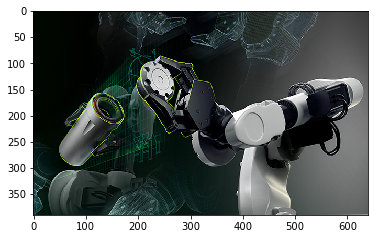

In [79]:
# Read in and plot the image
image = mpimg.imread('robo.jpeg')
plt.imshow(image)

In [80]:
# Construct the histograms in R, G and B
r_hist = np.histogram(image[:, :, 0], bins=32, range=(0, 256))
g_hist = np.histogram(image[:, :, 1], bins=32, range=(0, 256))
b_hist = np.histogram(image[:, :, 2], bins=32, range=(0, 256))

r/g/b_hist [0] contains the counts in each of the bins and [1] contains the bin edges (so it is one element longer than [0])

In [81]:
r_hist

(array([74814, 20808, 15574, 13564, 12414, 11686,  8284,  6840,  8310,
        10271,  8138,  7500,  7613,  5813,  5300,  6769,  3380,  1804,
         1935,  1811,  1760,  2147,  4113,  1697,  1428,  1774,  1638,
          895,   442,   254,   251,   573]),
 array([   0.,    8.,   16.,   24.,   32.,   40.,   48.,   56.,   64.,
          72.,   80.,   88.,   96.,  104.,  112.,  120.,  128.,  136.,
         144.,  152.,  160.,  168.,  176.,  184.,  192.,  200.,  208.,
         216.,  224.,  232.,  240.,  248.,  256.]))

In [82]:
r_hist[0]

array([74814, 20808, 15574, 13564, 12414, 11686,  8284,  6840,  8310,
       10271,  8138,  7500,  7613,  5813,  5300,  6769,  3380,  1804,
        1935,  1811,  1760,  2147,  4113,  1697,  1428,  1774,  1638,
         895,   442,   254,   251,   573])

In [83]:
r_hist[1]

array([   0.,    8.,   16.,   24.,   32.,   40.,   48.,   56.,   64.,
         72.,   80.,   88.,   96.,  104.,  112.,  120.,  128.,  136.,
        144.,  152.,  160.,  168.,  176.,  184.,  192.,  200.,  208.,
        216.,  224.,  232.,  240.,  248.,  256.])

In [84]:
b_hist[0]

array([46971, 21240, 20297, 17924, 14728, 13967, 10936,  9099, 10442,
       11998,  8852,  7978,  8530,  6892,  5967,  7373,  3763,  1824,
        1969,  1972,  1784,  2084,  4138,  1824,  1402,  1527,  1575,
        1063,   438,   238,   227,   578])

In [85]:
g_hist[0]

array([45419, 16504, 21027, 17931, 16349, 14391, 11367,  9685, 10989,
       11525,  9129,  8025,  8637,  7048,  5891,  7443,  4168,  1916,
        2072,  2049,  1751,  2100,  3971,  2169,  1597,  1748,  1689,
        1142,   527,   315,   281,   745])

In [86]:
# Compute bin centers from the bin edges
bin_edges = r_hist[1]
bin_centers = (bin_edges[1:] + bin_edges[0:len(bin_edges)-1])/2

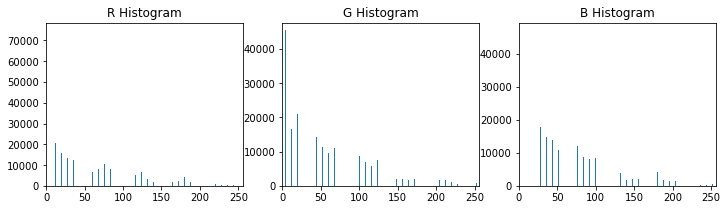

In [87]:
# Plot the results in a bar chart
fig = plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.bar(bin_centers, r_hist[0])
plt.xlim(0, 256)
plt.title('R Histogram')
plt.subplot(132)
plt.bar(bin_centers, g_hist[0])
plt.xlim(0, 256)
plt.title('G Histogram')
plt.subplot(133)
plt.bar(bin_centers, b_hist[0])
plt.xlim(0, 256)
plt.title('B Histogram')
plt.show()

The feature vector associated with these histograms will then simply  be the three distributions concatenated together (also cast to float so we dont do integer division later)

In [88]:
hist_features = np.concatenate((r_hist[0], g_hist[0], b_hist[0])).astype(np.float64)

In [89]:
# normalize so we can compare 
norm_features = hist_features / np.sum(hist_features)

In [90]:
dst = np.zeros_like(norm_features)

In [95]:
# Define a function to compute color histogram features
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Convert from RGB to HSV using cv2.cvtColor()
    dst = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    # Compute the histogram of the HSV channels separately
    h_hist = np.histogram(image[:, :, 0], nbins, bins_range)
    s_hist = np.histogram(image[:, :, 1], nbins, bins_range)
    v_hist = np.histogram(image[:, :, 2], nbins, bins_range)
    
    # Concatenate the histograms into a single feature vector
    out = np.concatenate((h_hist[0], s_hist[0], v_hist[0])).astype(np.float64)
    
    # Normalize the result
    out *= 1/np.sum(out)
    
    # Return the feature vector
    return out
    

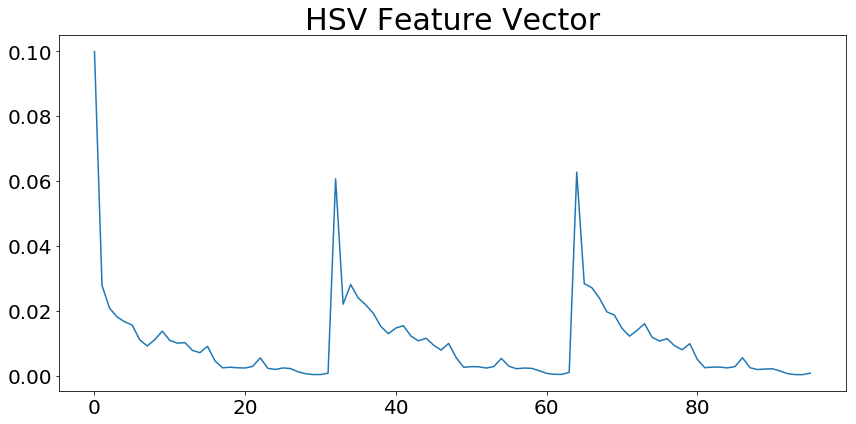

In [98]:
feature_vec = color_hist(image, nbins=32, bins_range=(0, 256))

# Plot a figure with all three bar charts
if feature_vec is not None:
    fig = plt.figure(figsize=(12,6))
    plt.plot(feature_vec)
    plt.title('HSV Feature Vector', fontsize=30)
    plt.tick_params(axis='both', which='major', labelsize=20)
    fig.tight_layout()
else:
    print("Your function is returning None...")

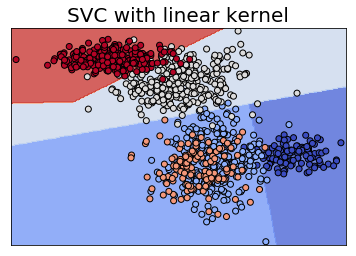

In [102]:
# Support Vector Machine

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from generate_clusters import cluster_gen

np.random.seed(424) # Change the number to generate a different cluster.

n_clusters = 5
clusters_x, clusters_y, labels = cluster_gen(n_clusters)

# Convert to a training dataset in sklearn format
X = np.float32((np.concatenate(clusters_x), np.concatenate(clusters_y))).transpose()
y = np.float32((np.concatenate(labels)))

# Create an instance of SVM and fit the data.
ker = 'linear'
svc = svm.SVC(kernel=ker).fit(X, y)

# Create a mesh that we will use to colorfully plot the decision surface
# Plotting Routine courtesy of: http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py
# Note: this coloring scheme breaks down at > 7 clusters or so

h = 0.2  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # -1 and +1 to add some margins
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Classify each block of the mesh (used to assign its color)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVC with '+ker+' kernel', fontsize=20)